In [1]:
import sgkit as sg
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import allel

#biological processes

panther_bp = pd.read_csv('/Users/christinagkertsou/Desktop/telikoanalysis.txt',

sep='\t',

names=['Term', "extra", 'ref', 'expected', 'over/under', 'Fold Enrichment', 'Raw p-value', 'padj'])

In [2]:
panther_bp

,Term,extra,ref,expected,over/under,Fold Enrichment,Raw p-value,padj
0,ribosome biogenesis (GO:0042254),160,9,1.76,+,5.11,9.740000e-05,0.009110
1,ribonucleoprotein complex biogenesis (GO:0022613),201,11,2.21,+,4.98,2.080000e-05,0.002280
2,ncRNA metabolic process (GO:0034660),246,11,2.71,+,4.07,1.190000e-04,0.010100
3,translational elongation (GO:0006414),224,10,2.46,+,4.06,2.460000e-04,0.020000
4,translation (GO:0006412),224,10,2.46,+,4.06,2.460000e-04,0.019100
5,peptide biosynthetic process (GO:0043043),226,10,2.49,+,4.02,2.630000e-04,0.019700
6,RNA processing (GO:0006396),376,15,4.14,+,3.63,2.470000e-05,0.002560
7,peptide metabolic process (GO:0006518),301,11,3.31,+,3.32,6.240000e-04,0.041700
8,cellular protein metabolic process (GO:0044267),995,27,10.94,+,2.47,2.500000e-05,0.002460
9,RNA metabolic process (GO:0016070),1433,37,15.76,+,2.35,1.010000e-06,0.000379


In [3]:
panther_bp['-log10padj'] = panther_bp.apply(lambda x: -np.log10(x.padj), axis=1)

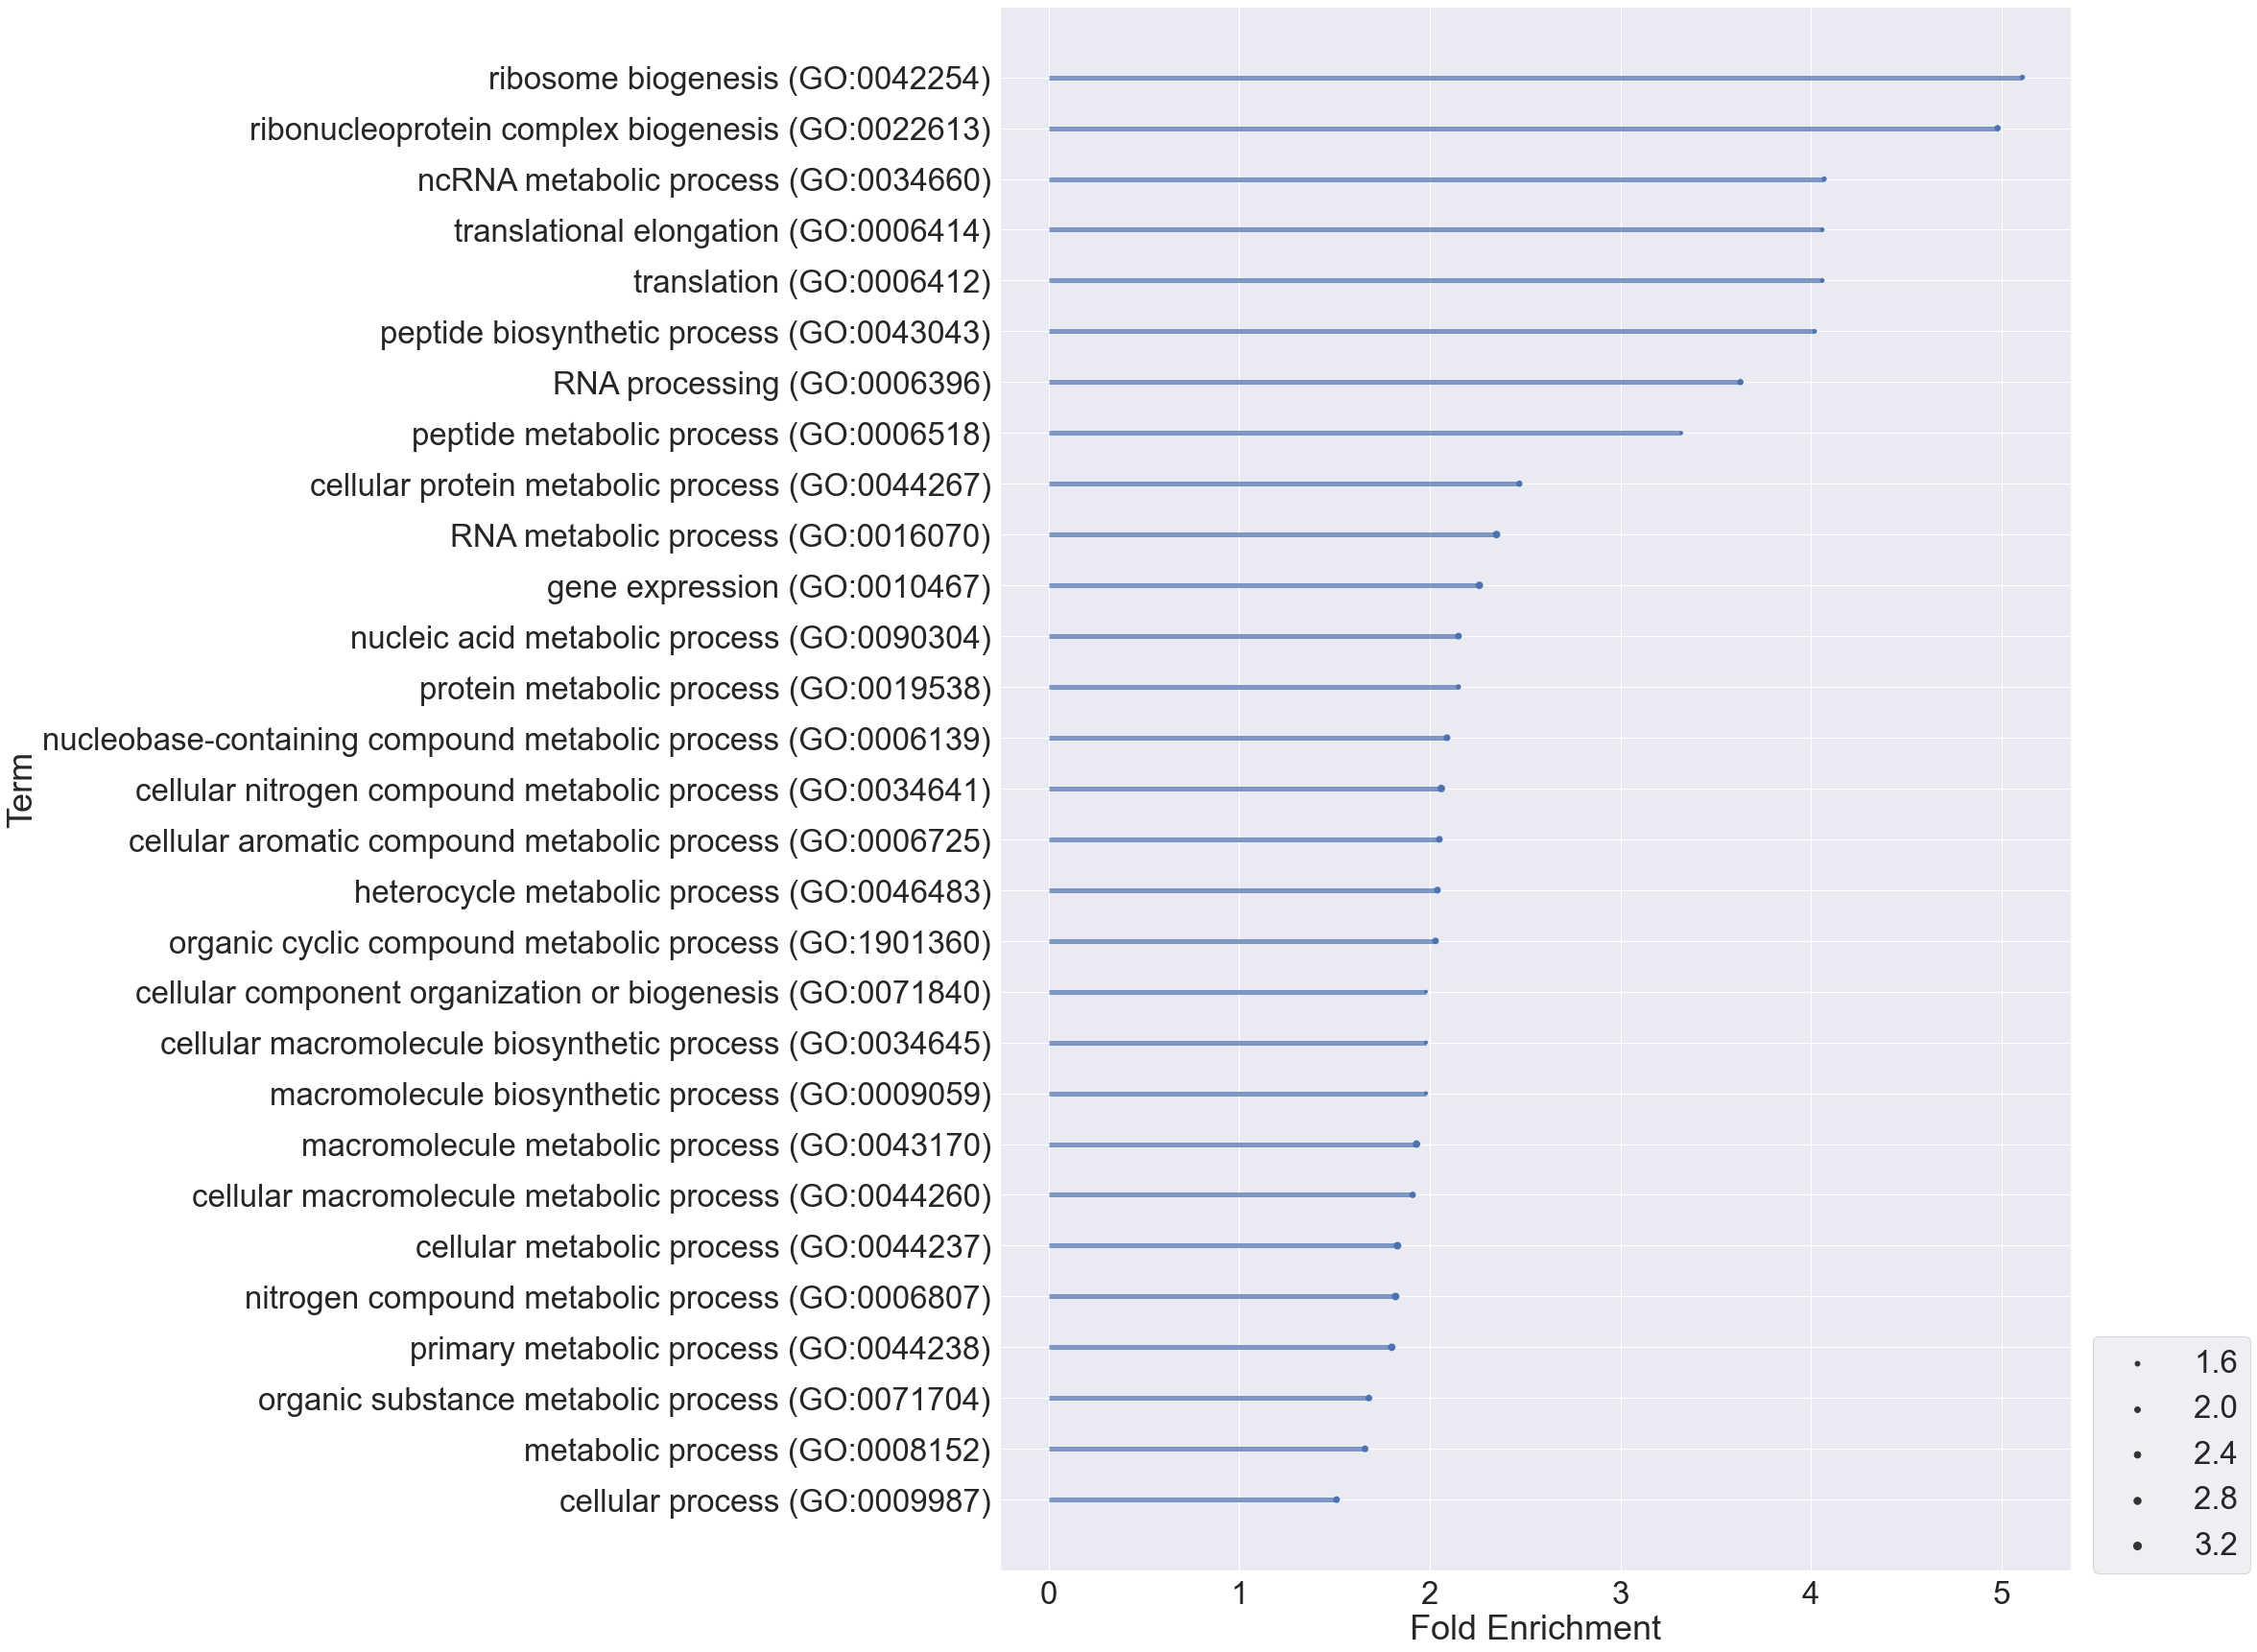

In [16]:
import matplotlib.pyplot as plt

import seaborn as sns

fig, ax1 = plt.subplots(figsize=(20, 30))
sns.set(font_scale=3)
sns.scatterplot(data=panther_bp, x='Fold Enrichment', y='Term', size='-log10padj', ax=ax1)
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)
ax1.hlines(y=panther_bp['Term'], xmin=0, xmax=panther_bp['Fold Enrichment'], linewidth=5, alpha=0.7)

In [ ]:
panther_bp2 = pd.read_csv('/Users/christinagkertsou/Desktop/antee.txt',

sep='\t',

names=['Term', "extra", 'ref', 'expected', 'over/under', 'Fold Enrichment', 'Raw p-value', 'padj'])

In [ ]:
panther_bp2['-log10padj'] = panther_bp2.apply(lambda x: -np.log10(x.padj), axis=1)

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

fig1, ax2 = plt.subplots(figsize=(20, 30))
sns.set(font_scale=3)
sns.scatterplot(data=panther_bp2, x='Fold Enrichment', y='Term', size='-log10padj', ax=ax2)
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)
ax2.hlines(y=panther_bp2['Term'], xmin=0, xmax=panther_bp2['Fold Enrichment'], linewidth=5, alpha=0.7)